In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
res = pd.read_csv('../multi_model_multi_metric_results_50samples.csv')

In [11]:
res.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,80762e40,0.447147,0.3753,0.335408,0.401527,0.332590,0.401527,0.336935,0.401527,0.378995,...,iotagpu02,140.221.68.6,311.944719,0,1,"1_batch_size=655,dropout=0.78978,epochs=64,lea...",0.089042,0.789783,64,655
1,8076cef4,0.919103,0.9198,0.694851,0.889383,0.711761,0.892435,0.715957,0.895359,0.829831,...,iotagpu02,140.221.68.6,408.235619,0,1,"2_batch_size=605,dropout=0.50079,epochs=86,lea...",0.069839,0.500794,86,605
2,8077106c,0.622794,0.6548,0.284553,0.691307,0.290432,0.691682,0.301814,0.698311,0.529462,...,iotagpu02,140.221.68.6,460.259930,0,1,"3_batch_size=615,dropout=0.84247,epochs=97,lea...",0.052629,0.842473,97,615
3,80774438,0.930422,0.9243,0.705808,0.894296,0.709053,0.896703,0.727786,0.898692,0.835883,...,iotagpu02,140.221.68.6,271.590799,0,1,"4_batch_size=735,dropout=0.73375,epochs=57,lea...",0.040877,0.733748,57,735
4,80777c46,0.918213,0.9166,0.632138,0.933339,0.618805,0.936497,0.631436,0.942987,0.816252,...,iotagpu02,140.221.68.6,228.394174,0,1,"5_batch_size=877,dropout=0.8139,epochs=48,lear...",0.039926,0.813899,48,877


In [67]:
sorted_res = res.sort_values('average_res', ascending=False)

In [68]:
sorted_res = sorted_res.reset_index(drop=True)

In [49]:
sorted_res.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,0e5929d2,0.998197,0.9811,0.994332,1.000000,0.994939,1.0,0.996761,0.998785,0.995514,...,iotagpu02,140.221.68.6,256.607727,0,1,"14_batch_size=380,dropout=0.24657,epochs=48,le...",0.000825,0.246572,48,380
1,9151e550,0.996826,0.9795,0.993781,1.000000,0.992248,1.0,0.993100,1.000000,0.994432,...,iotagpu02,140.221.68.6,320.464005,0,1,"35_batch_size=903,dropout=0.27537,epochs=66,le...",0.012401,0.275365,66,903
2,76371a10,0.998608,0.9805,0.989321,1.000000,0.989502,1.0,0.988959,1.000000,0.993361,...,iotagpu02,140.221.68.6,324.775977,0,1,"3_batch_size=425,dropout=0.20528,epochs=63,lea...",0.006298,0.205277,63,425
3,7638fede,0.996219,0.9772,0.989762,1.000000,0.990684,1.0,0.989116,1.000000,0.992873,...,iotagpu02,140.221.68.6,273.535355,0,1,"13_batch_size=834,dropout=0.33713,epochs=54,le...",0.011433,0.337133,54,834
4,91524496,0.997467,0.9791,0.987692,0.999919,0.987692,1.0,0.987206,0.995628,0.991838,...,iotagpu02,140.221.68.6,304.021725,0,1,"37_batch_size=950,dropout=0.39859,epochs=64,le...",0.008333,0.398595,64,950


### Now, running KL Divergence to compare the weight distributions of the top hyperspace results

In [53]:
config_list = []
for i in range(5):
    config = {}
    for label in ['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']:
        new_label = label.split('config.')[-1]
        config[new_label] = sorted_res[label][i]
    config_list.append(config)

In [54]:
high_config_list = config_list

In [55]:
high_config_list

[{'learning_rate': 0.0008247026118279462,
  'dropout': 0.2465723148341217,
  'epochs': 48,
  'batch_size': 380},
 {'learning_rate': 0.012400983319850551,
  'dropout': 0.2753653256155508,
  'epochs': 66,
  'batch_size': 903},
 {'learning_rate': 0.00629794626194513,
  'dropout': 0.20527720389732526,
  'epochs': 63,
  'batch_size': 425},
 {'learning_rate': 0.011433179648786712,
  'dropout': 0.33713250206233825,
  'epochs': 54,
  'batch_size': 834},
 {'learning_rate': 0.008332646839818986,
  'dropout': 0.3985947224532251,
  'epochs': 64,
  'batch_size': 950}]

In [50]:
opposite = res.sort_values('average_res', ascending=True)
opposite = opposite.reset_index(drop=True)

In [51]:
opposite.head()

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,d11fa67e,0.098822,0.1028,0.044776,0.104478,0.044776,0.104478,0.044776,0.104478,0.081173,...,iotagpu02,140.221.68.6,521.556700,0,1,"26_batch_size=67,dropout=0.88473,epochs=68,lea...",0.099493,0.884730,68,67
1,807946ca,0.115931,0.1321,0.100993,0.051325,0.100993,0.051325,0.100993,0.051325,0.088123,...,iotagpu02,140.221.68.6,415.407106,0,1,"14_batch_size=604,dropout=0.89302,epochs=85,le...",0.086946,0.893016,85,604
2,44b37ac4,0.150513,0.1028,0.061966,0.097222,0.067308,0.097222,0.070513,0.097222,0.093096,...,iotagpu02,140.221.68.6,352.766173,0,1,"28_batch_size=72,dropout=0.84538,epochs=47,lea...",0.060203,0.845378,47,72
3,de73a89c,0.098633,0.0980,0.050000,0.150000,0.050000,0.150000,0.050000,0.150000,0.099579,...,iotagpu02,140.221.68.6,320.834164,0,1,"42_batch_size=100,dropout=0.89965,epochs=49,le...",0.082187,0.899646,49,100
4,d11cb46e,0.106483,0.1028,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.101160,...,iotagpu02,140.221.68.6,747.886587,0,1,"10_batch_size=60,dropout=0.84696,epochs=95,lea...",0.088616,0.846961,95,60


In [56]:
low_config_list = []
for i in range(5):
    config = {}
    for label in ['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']:
        new_label = label.split('config.')[-1]
        config[new_label] = opposite[label][i]
        print(opposite[label][i])
    low_config_list.append(config)

0.09949307671494452
0.8847296070468049
68
67
0.08694568938709626
0.8930164363399653
85
604
0.060202546820720335
0.8453783367544603
47
72
0.08218697437893893
0.8996455090169381
49
100
0.0886164883077212
0.8469608869505587
95
60


In [57]:
low_config_list

[{'learning_rate': 0.09949307671494452,
  'dropout': 0.8847296070468049,
  'epochs': 68,
  'batch_size': 67},
 {'learning_rate': 0.08694568938709626,
  'dropout': 0.8930164363399653,
  'epochs': 85,
  'batch_size': 604},
 {'learning_rate': 0.060202546820720335,
  'dropout': 0.8453783367544603,
  'epochs': 47,
  'batch_size': 72},
 {'learning_rate': 0.08218697437893893,
  'dropout': 0.8996455090169381,
  'epochs': 49,
  'batch_size': 100},
 {'learning_rate': 0.0886164883077212,
  'dropout': 0.8469608869505587,
  'epochs': 95,
  'batch_size': 60}]

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

In [59]:
res['pca'] = pca.fit_transform(res[['config.learning_rate', 'config.dropout', 'config.epochs', 'config.batch_size']])

In [69]:
top20 = sorted_res[:20]

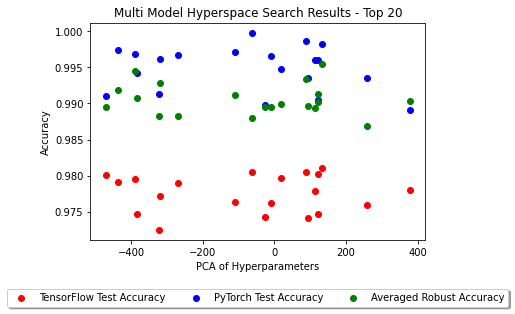

In [74]:
ax = plt.gca()
ax.scatter(top20['pca'], top20['tf_test_acc'], color="red", label="TensorFlow Test Accuracy")
ax.scatter(top20['pca'], top20['pt_test_acc'], color="blue", label="PyTorch Test Accuracy")
ax.scatter(top20['pca'], top20['average_res'], color="green", label="Averaged Robust Accuracy")
ax.set_title("Multi Model Hyperspace Search Results - Top 20")
ax.set_xlabel("PCA of Hyperparameters")
ax.set_ylabel("Accuracy")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)
plt.show()

In [79]:
bottom20 = sorted_res[-20:-1]

In [80]:
bottom20

,trial_id,pt_test_acc,tf_test_acc,pt_uniform_accuracy,tf_uniform_accuracy,pt_gaussian_accuracy,tf_gaussian_accuracy,pt_saltandpepper_accuracy,tf_saltandpepper_accuracy,average_res,...,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,pca
780,d11ee50e,0.195739,0.1990,0.147025,0.349754,0.147594,0.349754,0.149488,0.349754,0.236013,...,140.221.68.6,248.105159,0,1,"22_batch_size=406,dropout=0.86806,epochs=49,le...",0.067921,0.868055,49,406,106.918429
781,44b4ee9a,0.253764,0.2543,0.162489,0.297753,0.159896,0.297753,0.162921,0.296889,0.235721,...,140.221.68.6,497.472553,0,1,"36_batch_size=178,dropout=0.83425,epochs=83,le...",0.059222,0.834249,83,178,334.862405
782,44b08990,0.293056,0.2454,0.144700,0.301829,0.151501,0.301595,0.145638,0.300657,0.235547,...,140.221.68.6,416.802325,0,1,"12_batch_size=328,dropout=0.8729,epochs=81,lea...",0.061804,0.872902,81,328,184.865883
783,80797726,0.183241,0.1896,0.144273,0.351528,0.146792,0.351528,0.144105,0.351528,0.232824,...,140.221.68.6,242.937819,0,1,"15_batch_size=458,dropout=0.88588,epochs=49,le...",0.084049,0.885884,49,458,54.918498
784,3d750c04,0.240619,0.1724,0.228307,0.251656,0.231024,0.251656,0.231194,0.251656,0.232314,...,140.221.68.6,118.591442,0,1,"4_batch_size=906,dropout=0.8751,epochs=21,lear...",0.097746,0.875104,21,906,-393.035014
785,807a9ed0,0.238424,0.2299,0.050854,0.393996,0.050360,0.394589,0.052138,0.395872,0.225767,...,140.221.68.6,332.749711,0,1,"21_batch_size=779,dropout=0.89951,epochs=67,le...",0.071314,0.899511,67,779,-266.110569
786,807cabee,0.221801,0.2101,0.154710,0.299193,0.152694,0.299625,0.154278,0.299625,0.224003,...,140.221.68.6,252.108817,0,1,"31_batch_size=534,dropout=0.88647,epochs=49,le...",0.066280,0.886471,49,534,-21.081400
787,de6c7ac2,0.203935,0.1964,0.136393,0.302521,0.138332,0.302521,0.138332,0.302521,0.215119,...,140.221.68.6,138.185447,0,1,"4_batch_size=238,dropout=0.89581,epochs=24,lea...",0.053169,0.895809,24,238,274.959172
788,3d793996,0.200446,0.1559,0.166667,0.250794,0.169353,0.250794,0.167521,0.250794,0.201534,...,140.221.68.6,264.371264,0,1,"26_batch_size=630,dropout=0.84996,epochs=53,le...",0.091189,0.849962,53,630,-117.087825
789,de72c2ba,0.201415,0.1779,0.102777,0.298755,0.105330,0.298755,0.106288,0.298755,0.198747,...,140.221.68.6,204.850947,0,1,"38_batch_size=241,dropout=0.81132,epochs=37,le...",0.093501,0.811324,37,241,271.937875


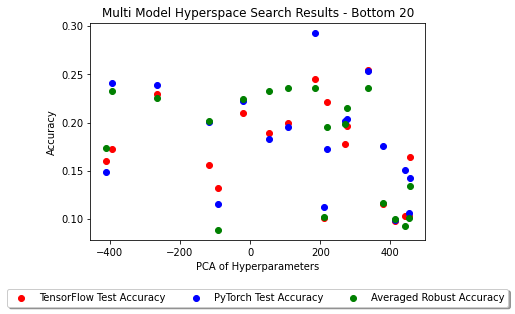

In [81]:
ax = plt.gca()
ax.scatter(bottom20['pca'], bottom20['tf_test_acc'], color="red", label="TensorFlow Test Accuracy")
ax.scatter(bottom20['pca'], bottom20['pt_test_acc'], color="blue", label="PyTorch Test Accuracy")
ax.scatter(bottom20['pca'], bottom20['average_res'], color="green", label="Averaged Robust Accuracy")
ax.set_title("Multi Model Hyperspace Search Results - Bottom 20")
ax.set_xlabel("PCA of Hyperparameters")
ax.set_ylabel("Accuracy")
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20),
          fancybox=True, shadow=True, ncol=5)
plt.show()